### Тема: Проверка гипотез о значениях параметров распределения генеральной совокупности

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **6**, вариант № **3**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import math
import scipy.stats as sts
import scipy.special as sc
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Задание 1
Смоделируйте выборку объема $n = 100$ из нормально распределенной генеральной совокупности с параметрами $m_0,\, \sigma_0$ (значение этих параметров возьмите равным длине вашего имени и фамилии соотвественно) и далее используйте ее в качестве опытнх данных.

Задача состоит в проверке гипотезы $H_0:\, m = m_0$ при неизвестной дисперсии. Сформулируйте двустороннюю альтернативу, выберите статистику, укажите ее закон распределения. Вычислите $p$ - значение и найдите диапазон значений $\alpha$, при которых основная гипотеза принимается.

Задание выполните двумя способами: без использования имеющейся в языке программирования Python функции проверки параметрических гипотез и воспользовавшисьфункцией ttest_1samp. Сопоставьте результаты.

Подходящая статистика:
$$W = \frac{\bar{X} - m_0}{S/\sqrt{n}} \sim St(n - 1)$$

In [2]:
# статистика для математического ожидания при неизвестной дисперсии
# для нормального распределения
def stat_criteria_1(sample, m_0):
    n = len(sample)
    S = np.sqrt(n / (n - 1) * np.var(sample))
    
    return (np.mean(sample) - m_0) / (S / np.sqrt(n))

In [3]:
# размер выборки
sample_size = 100

# параметры нормального распределения
m = len("Максим")
sig = len("Лежнин")

# нормальная выборка
sample = np.random.normal(m, sig, sample_size)

# гипотеза H_0
m_0 = m

# выборочное значение статистики
ssv = stat_criteria_1(sample, m_0)

# считаю значение p двумя способами
p_1 = 2 * min(sts.t(df=sample_size - 1).cdf(ssv), 
              1 - sts.t(df=sample_size - 1).cdf(ssv))
p_2 = sts.ttest_1samp(sample, m_0).pvalue

# вывод на экран
print(f"Значение p, посчитанное мной: {p_1}")
print(f"Значение p, посчитанное функцией: {p_2}")

Значение p, посчитанное мной: 0.15417308347188619
Значение p, посчитанное функцией: 0.1541730834718862


Значения совпадают.

### Задание 2
Смоделируйте выборку объема $n = 90$ из нормально распределенной генеральной совокупности с параметрами $m_0,\, \sigma_0$ (значение этих параметров возьмите равным длине вашего имени и фамилии соотвественно) и далее используйте ее в качестве опытных данных.

Задача состоит в проверке гипотезы $H_0:\, \sigma = \sigma_0$ при неизвестном математическом ожидании. Исходя из значения выборочного среднего, сформулируйте подходящую одностороннюю альтернативу, выберите статистику и укажите закон ее распределения.

- Не используя имеющиеся в языке программирования Python функции проверки параметрических гипотез, вычислите $p$ - значение и найдите диапазон значений $\alpha$, при которых основная гипотеза принимается.
- Выберите одно из значений $\alpha$ из найденного диапазона и, исходя из соответствующей этому значению критической области (согласно традиционной методике критической области), вычислите ошибку второго рода.

Подходящая статистика:
$$V_2 = \frac{S^2}{\sigma_0^2 / (n - 1)} \sim \chi^2(n - 1)$$

Пусть $Z(X_1,\, ...,\, X_n)$ - функция-статистика (написана выше), $G_\alpha,\, G_{1 - \alpha}$ - критическая область и ее дополнение соответственно. Для вычисления $\alpha_2$ нужно конкретизировать альтернативную гипотезу. То есть наши гипотезы имеют следующий вид: $H_0:\ \sigma = \sigma_0;\ H_1:\ \sigma = \sigma_1$. Теперь немного формул для $\alpha_2$:

$$\alpha_2 = P\{Z \in G_{1 - \alpha} | H_1\}$$

Если альтернатива левосторонняя:

$$
\begin{align*}
&\alpha_2 = P\{Z > Z_{\alpha,\, H_1}\} \\
&\alpha_2 = 1 - P\left\{Z < Z_\alpha \frac{\sigma_0^2}{\sigma_1^2}\right\} \\
&\alpha_2 = 1 - F_Z\left(Z_\alpha \frac{\sigma_0^2}{\sigma_1^2}\right)
\end{align*}
$$

Если альтернатива правосторонняя:

$$
\begin{align*}
&\alpha_2 = P\{Z < Z_{1 - \alpha,\, H_1}\} \\
&\alpha_2 = F_Z\left(Z_{1 - \alpha} \frac{\sigma_0^2}{\sigma_1^2}\right)
\end{align*}
$$

In [4]:
# статистика для среднеквадратичного отклонения при неизвестном мат ожидании
# для нормального распределения
def stat_criteria_2(sample, sig_0):
    n = len(sample)
    S_sq = n / (n - 1) * np.var(sample)
    return S_sq / (sig_0 ** 2 / (n - 1))

In [5]:
# размер выборки
sample_size = 90

# параметры нормального распределения
m = len("Максим")
sig = len("Лежнин")

# нормальная выборка
sample = np.random.normal(m, sig, sample_size)

# гипотеза H_0
sig_0 = sig

# делаю выбор односторонней альтернативной гипотезы
right = np.std(sample) > sig_0

# критическая область
G_a = lambda a: sts.chi2(df=sample_size - 1).ppf(right + a * (-1)**right)

# выборочное значение статистики
ssv = stat_criteria_2(sample, sig_0)

# получаю значение p и вывожу его на экран
if right:
    p = 1 - sts.chi2(df=sample_size - 1).cdf(ssv)
else:
    p = sts.chi2(df=sample_size - 1).cdf(ssv)
print(f"Значение p: {p}")

# делаю уровень значимости в 2 раза меньше p
a = p / 2

# конкретизирую альтернативную гипотезу
sig_1 = sig_0 + (-1)**(1 + right)

# высчитываю ошибку второго рода по формулам
if right:
    Z = sts.chi2(sample_size - 1).ppf(1 - a)
    a_2 = sts.chi2(sample_size - 1).cdf(Z * (sig_0 / sig_1)**2)
else:
    Z = sts.chi2(sample_size - 1).ppf(a)
    a_2 = 1 - sts.chi2(sample_size - 1).cdf(Z * (sig_0 / sig_1)**2)

# вывожу результат на экран
print(f"Ошибка второго рода: {a_2}")

Значение p: 0.26000058326118275
Ошибка второго рода: 0.09556611269438797


### Задание 3
Пусть проверяется гипотеза $H_0:\, m = m_0$ ($m_0$ - длина вашего имени) на уровне значимости $\alpha = 0.05$ при альтернатвной гипотезе $H_1:\, m > m_0$ в предположении, что среднее квадратичное отклонение известно и равно длине вашей фамилии. Рассмотрим три случая:
- Используется выборка объема $n = 30$;
- Используется выборка объема $n = 60$;
- Используется выборка объема $n = 120$;

Для каждого случая укажите критическую область проверки гипотезы. Найдите функцию мощности критерия и постройте ее график (диапазон значений $m$ нужно взять таким, чтобы адекватно представить множество возможных значений функции мощности).

Ответьте на вопросы: как функция мощности связана с ошибками второго рода? первого рода?

Подходящая статистика:
$$U = \frac{\bar{X} - m_0}{\sigma / \sqrt{n}} \sim N(0,\, 1)$$

In [6]:
# функция мощности критерия
def power_function(sample, m, sig, m_eval, a):
    n = len(sample)
    Z = sts.norm(0, 1).ppf(1 - a)
    return 1 - sts.norm(0, 1).cdf(Z + (m - m_eval) / (sig / np.sqrt(n)))

Так как уровень значимости фиксирован и такой же для всех выборок, то критическая область для всех случаев одна: {x|x > 1.6448536269514722}


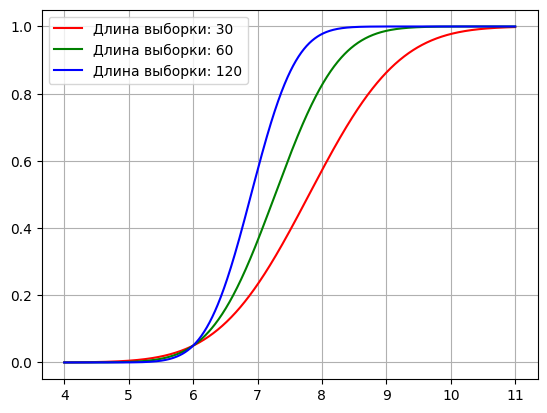

In [7]:
# параметры нормального распределения
m = len("Максим")
sig = len("Лежнин")

# гипотеза H_0
m_0 = m

# уровень значимости
a = 0.05

# критическая область (больше полученного значения)
G_a = sts.norm(0, 1).ppf(1 - a)
print("Так как уровень значимости фиксирован и такой же для всех выборок, то",
     f"критическая область для всех случаев одна: {{x|x > {G_a}}}")

# размеры выборок
sample_sizes = [30, 60, 120]

# цвета будущих графиков
colors = ['r', 'g', 'b']

# массив оценок
m_eval = np.linspace(m - 2, m + 5, 1000)

# цикл для различных выборок
for i in range(len(sample_sizes)):
    # длина выборки
    sample_size = sample_sizes[i]
    
    # нормальная выборка
    sample = np.random.normal(m, sig, sample_size)

    # визуализируем функцию мощности
    plt.plot(m_eval, power_function(sample, m, sig, m_eval, a), color=colors[i],
             label=f"Длина выборки: {sample_size}")

# параметры визуализации
plt.legend()
plt.grid(True)

Пусть есть две гипотезы: основная $H_0:\ \theta = \theta_0$ и альтернативная $H_1:\ \theta = \theta_1$. Функция мощности связана с ошибками первого и второго рода следующим образом:
$$\mathcal{M}(G_\alpha,\, \theta_0) = \alpha \text{, где $\alpha$ - ошибка первого рода}$$
$$\mathcal{M}(G_\alpha,\, \theta_1) = 1 - \alpha_2 \text{, где $\alpha_2$ - ошибка второго рода}$$

### Задание 4
В урне содержатся неразличимые на ощупь черные и белые шары. Предполагается, что число черных и белых шаров в урне одинаково. Эта гипотеза принимается, если при извлечении 50 шаров (с возвращением) число черных шаров будет в пределах от 20 до 30.

- Сформулируйте основную гипотезу, укажите статистику и критическую область критерий;
- Опишите, в чем состоит ошибка первого рода, и вычислите ее вероятность;
- Найдите аналитическое выражение зависимости вероятности ошибки второго рода от альтернативных значений доли черных шаров в выборке и постройте ее график.

Пусть $Z(X_1,\, ...,\, X_n)$ - функция-статистика, $G_\alpha,\, G_{1 - \alpha}$ - критическая область и ее дополнение соответственно.
$$
\begin{gather*}
X \sim I(p) \\
H_0:\ p = 0.5 \\
Z = \frac{p^* - p_0}{\sqrt{p_0q_0/n}} \sim N(0,\, 1),\ p^* = \frac{1}{n}\sum_{i = 1}^n X_i \\
20 \leq \sum_{i = 1}^{50} X_i \leq 30 \implies 0.4 \leq p^* \leq 0.6 \\
G_{1 - \alpha} = \left[\frac{0.4 - 0.5}{\sqrt{0.5^2 / 50}},\, \frac{0.6 - 0.5}{\sqrt{0.5^2 / 50}} \right] = [-\sqrt{2},\, \sqrt{2}] \\
G_\alpha = (-\infty,\, -\sqrt{2}) \cup (\sqrt{2},\, +\infty)
\end{gather*}
$$

Теперь рассмотрим ошибки первого и второго рода:
$$
\begin{gather*}
\alpha = P\{Z \in G_\alpha | H_0\} = P\{Z < -\sqrt{2}\} + P\{Z > \sqrt{2}\} = 1 - F_Z(\sqrt{2}) + 1 - F_Z(\sqrt{2}) = 2 - 2\Phi(\sqrt{2}) \approx 0.1586 \\
\alpha_2 = P\{Z \in G_{1 - \alpha} | H_1\} = P\{-\sqrt{2} \leq Z_{H_1} \leq \sqrt{2}\} = P\left\{-\sqrt{2} \leq (Z + \frac{p_0 - p_1}{\sqrt{p_0q_0/n}}) \frac{\sqrt{p_0q_0}}{\sqrt{p_1q_1}} \leq \sqrt{2}\right\}  = \\
=  P\left\{-\sqrt{2}\frac{\sqrt{p_1q_1}}{\sqrt{p_0q_0}} + \frac{p_1 - p_0}{\sqrt{p_0q_0/n}} \leq Z \leq \sqrt{2}\frac{\sqrt{p_1q_1}}{\sqrt{p_0q_0}} + \frac{p_1 - p_0}{\sqrt{p_0q_0/n}}\right\} = \Phi(2\sqrt{2p_1q_1} + 10\sqrt{2}(p_1 - 0.5)) - \Phi(-2\sqrt{2p_1q_1} + 10\sqrt{2}(p_1 - 0.5))
\end{gather*}
$$

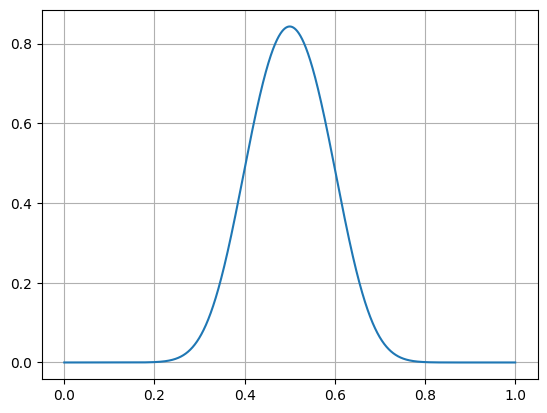

In [8]:
# гипотеза H_0
p_0 = 0.5

# альтернативная гипотеза H_1 (для графика)
p_1 = np.linspace(0, 1, 10000)

# считаю ошибку второго рода
d = 10 * np.sqrt(2) * (p_1 - 0.5)
Phi_1 = sts.norm(0, 1).cdf(2 * np.sqrt(2 * p_1 * (1 - p_1)) + d)
Phi_2 = sts.norm(0, 1).cdf(-2 * np.sqrt(2 * p_1 * (1 - p_1)) + d)
a_2 = Phi_1 - Phi_2

# визуализирую зависимость ошибки второго рода от альтернативного значения
plt.plot(p_1, a_2)
plt.grid(True)